In [75]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,decomposition,datasets
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
logistic=linear_model.LogisticRegression()
pca=decomposition.PCA()


In [77]:
SVM=svm.SVC()

In [78]:
help(Pipeline)

Help on class Pipeline in module sklearn.pipeline:

class Pipeline(sklearn.utils.metaestimators._BaseComposition)
 |  Pipeline(steps, memory=None, verbose=False)
 |  
 |  Pipeline of transforms with a final estimator.
 |  
 |  Sequentially apply a list of transforms and a final estimator.
 |  Intermediate steps of the pipeline must be 'transforms', that is, they
 |  must implement fit and transform methods.
 |  The final estimator only needs to implement fit.
 |  The transformers in the pipeline can be cached using ``memory`` argument.
 |  
 |  The purpose of the pipeline is to assemble several steps that can be
 |  cross-validated together while setting different parameters.
 |  For this, it enables setting parameters of the various steps using their
 |  names and the parameter name separated by a '__', as in the example below.
 |  A step's estimator may be replaced entirely by setting the parameter
 |  with its name to another estimator, or a transformer removed by setting
 |  it to 

In [79]:
pipe=Pipeline(steps=[('pca',pca),('logistic',logistic)])

In [80]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [81]:
n_components=[20,40,64]
Cs= np.logspace(-4, 4, 3)#创建e幂的等比数列
print(Cs)

[1.e-04 1.e+00 1.e+04]


In [82]:
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
X_digits.shape

(1797, 64)

In [84]:
pca.explained_variance_ratio_.cumsum()

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [85]:
estimator=GridSearchCV(pipe,dict(pca__n_components=n_components,logistic__C=Cs))
#除了最后一个节点外，其他节点都必须实现'fit()'和'transform()'方法
#因此需要pca.fit先

In [86]:
estimator.get_params().keys()
#Pipeline的参数选择来源,这些参数和pipe中适用的模型有密切关系，lr回归对应lr的参数，svm对应svm参数

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__pca', 'estimator__logistic', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estimator__pca__n_components', 'estimator__pca__random_state', 'estimator__pca__svd_solver', 'estimator__pca__tol', 'estimator__pca__whiten', 'estimator__logistic__C', 'estimator__logistic__class_weight', 'estimator__logistic__dual', 'estimator__logistic__fit_intercept', 'estimator__logistic__intercept_scaling', 'estimator__logistic__l1_ratio', 'estimator__logistic__max_iter', 'estimator__logistic__multi_class', 'estimator__logistic__n_jobs', 'estimator__logistic__penalty', 'estimator__logistic__random_state', 'estimator__logistic__solver', 'estimator__logistic__tol', 'estimator__logistic__verbose', 'estimator__logistic__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [87]:
estimator.fit(X_digits,y_digits)

C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kkluc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
               

In [88]:
estimator.predict(X_digits)

array([0, 1, 2, ..., 8, 9, 8])

In [89]:
(y_digits==estimator.predict(X_digits)).sum()

1769

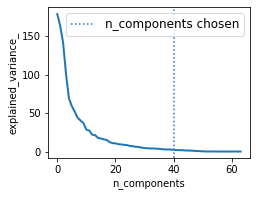

In [90]:
plt.figure(1, figsize=(4, 3))

plt.clf()

plt.axes([.2, .2, .7, .7])

plt.plot(pca.explained_variance_, linewidth=2)

plt.axis('tight')

plt.xlabel('n_components')

plt.ylabel('explained_variance_')

plt.axvline(

estimator.best_estimator_.named_steps['pca'].n_components,

linestyle=':',
label='n_components chosen')

plt.legend(prop=dict(size=12))

plt.show()